# Import des 3 modules pythons créés

In [1]:
from dataviz import graph_square, top_5, corr_matrice
#from dataviz import *
from scrapping import *
from data_cleaning import clean_stars, une_colonne_par_liste, regroup_by_decade

# Lancement du scrapping : 

In [2]:
# initialisation des dataframes :
movies_df = pd.DataFrame(columns=['Ranking', 'Title', 'Genre', 'Year','Runtime_min', 'Rating', 'Directors', 'Stars', 'Votes', 'Gross'])
final_df=pd.DataFrame()

#Scrapping des 5 pages de IMBD
for i in range(1, 250, 50):
    datas = request_url(i)
    movies_df = scrapping_web_page(datas, movies_df)
    final_df = pd.concat([final_df, movies_df], ignore_index=True)

new_dtypes = {"Ranking": int,  'Year': int, 'Runtime_min': int,'Rating':float,  'Votes': int, 'Gross': float}    
    
final_df = final_df.astype(new_dtypes)

final_df.head()

,Ranking,Title,Genre,Year,Runtime_min,Rating,Directors,Stars,Votes,Gross
0,1,Les Évadés,[Drama],1994,142,9.3,[Frank Darabont],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2387123,28341469.0
1,2,Le parrain,"[Crime, Drama]",1972,175,9.2,[Francis Ford Coppola],"['Marlon Brando', 'Al Pacino', 'James Caan', '...",1654466,134966411.0
2,3,The Dark Knight : Le Chevalier noir,"[Action, Crime, Drama]",2008,152,9.0,[Christopher Nolan],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",2350189,534858444.0
3,4,"Le parrain, 2ème partie","[Crime, Drama]",1974,202,9.0,[Francis Ford Coppola],"['Al Pacino', 'Robert De Niro', 'Robert Duvall...",1150811,57300000.0
4,5,12 Hommes en colère,"[Crime, Drama]",1957,96,9.0,[Sidney Lumet],"['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...",704659,4360000.0
...,...,...,...,...,...,...,...,...,...,...
245,246,Rebecca,"[Drama, Mystery, Romance]",1940,130,8.1,[Alfred Hitchcock],"['Laurence Olivier', 'Joan Fontaine', 'George ...",126173,4360000.0
246,247,Mr. Smith au sénat,"[Comedy, Drama]",1939,129,8.1,[Frank Capra],"['James Stewart', 'Jean Arthur', 'Claude Rains...",108534,9600000.0
247,248,Autant en emporte le vent,"[Drama, History, Romance]",1939,238,8.1,"[Victor Fleming, George Cukor, Sam Wood]","['Clark Gable', 'Vivien Leigh', 'Thomas Mitche...",294189,198676459.0
248,249,New York - Miami,"[Comedy, Romance]",1934,105,8.1,[Frank Capra],"['Clark Gable', 'Claudette Colbert', 'Walter C...",95821,4360000.0


# Affichage d'informations concernant les Genre, Directors et Stars

In [3]:
#nettoyage du dataframe 
final_df2= clean_stars(final_df)

Si vous souhaitez conaitre : 
    - Les STARS les plus présents dans le top 250 -  Tapez 1
    - Les DIRECTORS les plus présents dans le top 250 - Tapez 2
    - Les GENRES de film les plus dans le top 250 - Tapez 3
3


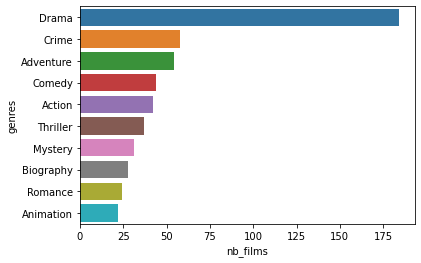

In [6]:
#Affichages des tops 
user_choice=int(input( """Si vous souhaitez conaitre : 
    - Les STARS les plus présents dans le top 250 -  Tapez 1
    - Les DIRECTORS les plus présents dans le top 250 - Tapez 2
    - Les GENRES de film les plus dans le top 250 - Tapez 3
"""))
result=top_5(user_choice, final_df2)

# Affichage des genres les plus représentés

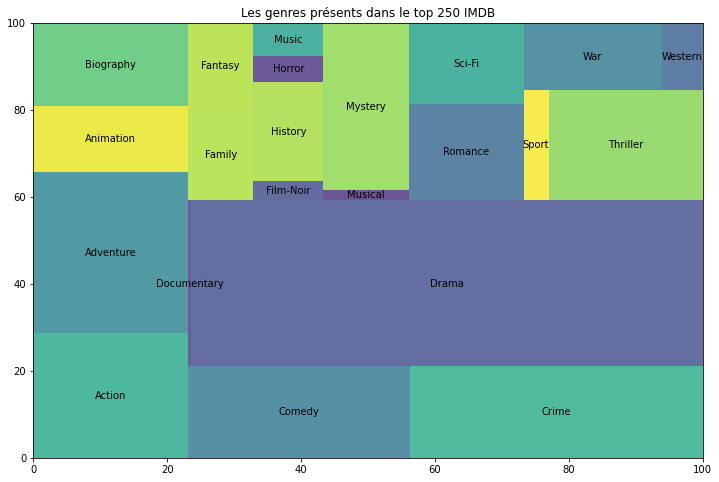

In [7]:
graph_square(final_df2)

<AxesSubplot:title={'center':'Matrice de Corrélation'}>

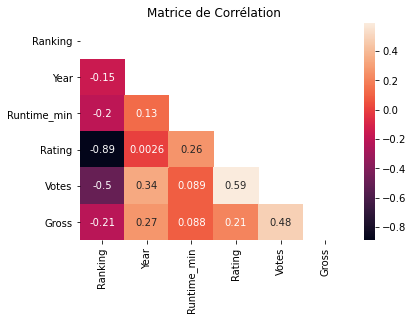

In [8]:
corr_matrice(final_df)

In [9]:
#creation de categorie 
total_by_decades=regroup_by_decade(final_df)

In [10]:
total_by_decades

,Decenie,Number_of_movies,Average_nb_of_votes,Average_ratings
0,"(1920, 1930]",5,94844.200000,8.220000
1,"(1930, 1940]",8,171315.375000,8.262500
2,"(1940, 1950]",11,221869.818182,8.300000
3,"(1950, 1960]",22,228077.681818,8.290909
4,"(1960, 1970]",16,234387.125000,8.293750
5,"(1970, 1980]",23,578415.565217,8.347826
6,"(1980, 1990]",25,480861.200000,8.272000
7,"(1990, 2000]",45,877425.977778,8.380000
8,"(2000, 2010]",47,769083.319149,8.304255
9,"(2010, 2020]",48,484358.854167,8.258333


<AxesSubplot:xlabel='Number_of_movies', ylabel='Decenie'>

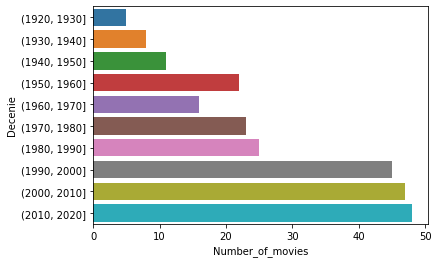

In [11]:
import seaborn as sns 
sns.barplot(data=total_by_decades,y='Decenie',x='Number_of_movies')

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(data=final_df,x='Votes',y='Rating')